## Check the manual QC of ANMN against automated. 


In [2]:
from dask.distributed import Client
client = Client(n_workers=16,threads_per_worker=16) 
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/ribeiron/proxy/8787/status,
Dashboard: /user/ribeiron/proxy/8787/status,Workers: 16
Total threads: 256,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37769,Workers: 16
Dashboard: /user/ribeiron/proxy/8787/status,Total threads: 256
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:40769,Total threads: 16
Dashboard: /user/ribeiron/proxy/33349/status,Memory: 512.00 MiB
Nanny: tcp://127.0.0.1:46261,


In [59]:
import glob
import json
import xarray as xr
files = glob.glob('./reffs/IMOS_ANMN-NSW_TZ_*.json')
len(files)

687

In [60]:
def check_manual(ref):
    with open(ref, 'r') as f:
      afile = json.load(f)
    log =json.loads(afile['refs']['.zattrs'])['quality_control_log']
    return  'manually' in afile['refs']['.zattrs']

def open_dataset(ref):
    ds = xr.open_dataset(
        "reference://", engine="zarr",
        backend_kwargs={
            "storage_options": {
                "fo": ref,
                "remote_protocol": "s3",
                "remote_options": {"anon": True}
            },
            "consolidated": False
        }
    )
    return ds

In [58]:
manual_qc = list(filter(lambda x:check_manual(x), files))
len(manual_qc)

154

In [70]:
data =[ open_dataset(qc) for qc in manual_qc]

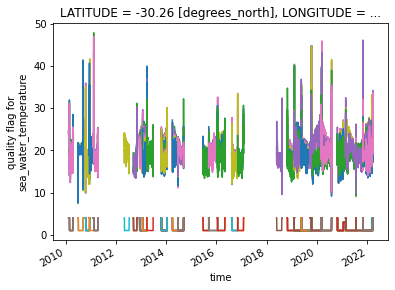

In [71]:
for d in data:
    d.TEMP.plot()
    d.TEMP_quality_control.plot()